In [1]:
%load_ext tensorboard

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
# os.environ['TENSORBOARD_BINARY'] = os.environ["CONDA_PREFIX"] + "/bin/tensorboard"

import sys
import json
import matplotlib.pyplot as plt
import numpy as np

import datetime

import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

In [3]:
HOME_DIR = os.path.abspath(".") + "/"
TRAIN_DIR = HOME_DIR + 'train_images'
VALIDATION_DIR = HOME_DIR + 'validation_images'
TEST_DIR = HOME_DIR + 'test_images'
TRAIN_LABELS = HOME_DIR + 'train_labels.csv'
VALIDATION_LABELS = HOME_DIR + 'validation_labels.csv'
TEST_LABELS = HOME_DIR + 'test_labels.csv'
EXTENSION = '.png'

In [4]:
# Load training images and labels
os.chdir(TRAIN_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
print('Number of training images:', len(images))
x_train = np.array(images)
print('x_train shape:', x_train.shape)
y_train_labels = np.genfromtxt(TRAIN_LABELS, delimiter=',')
print('Number of training labels equals number of training images:', len(y_train_labels) == x_train.shape[0])
y_train = keras.utils.to_categorical(y_train_labels, num_classes=2)

Number of training images: 740
x_train shape: (740, 600, 780, 3)
Number of training labels equals number of training images: True


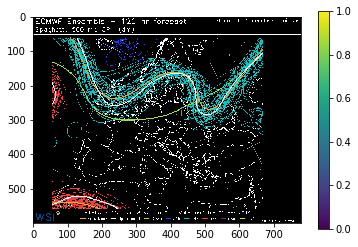

In [5]:
plt.imshow(x_train[0, :, :, :])
plt.colorbar()

In [6]:
# Load validation images and labels
os.chdir(VALIDATION_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
print('Number of validation images:', len(images))
x_validation = np.array(images)
print('x_validation shape:', x_validation.shape)
y_validation_labels = np.genfromtxt(VALIDATION_LABELS, delimiter=',')
print('Number of validation labels equals number of validation images:', len(y_validation_labels) == x_validation.shape[0])
y_validation = keras.utils.to_categorical(y_validation_labels, num_classes=2)

Number of validation images: 170
x_validation shape: (170, 600, 780, 3)
Number of validation labels equals number of validation images: True


In [7]:
# Load test images and labels
os.chdir(TEST_DIR)
im_files = sorted(os.listdir())
images = [plt.imread(f)[:,:,:3] for f in im_files if f.endswith(EXTENSION)]
print('Number of test images:', len(images))
x_test = np.array(images)
print('x_test shape:', x_test.shape)
y_test_labels = np.genfromtxt(TEST_LABELS, delimiter=',')
print('Number of test labels equals number of test images:', len(y_test_labels) == x_test.shape[0])
y_test = keras.utils.to_categorical(y_test_labels, num_classes=2)

Number of test images: 170
x_test shape: (170, 600, 780, 3)
Number of test labels equals number of test images: True


In [8]:
# Create the VGG-like model
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(600, 780, 3)))
model.add(Conv2D(32, (3, 3), strides=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), strides=2, activation='relu'))
model.add(Conv2D(64, (3, 3), strides=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # two categories
model.summary()
adam = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 299, 389, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 149, 194, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 97, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 97, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 11, 64)         0

In [9]:
log_dir = HOME_DIR + "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [10]:
# Learn and evaluate the model
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_validation, y_validation), callbacks=[tensorboard_callback])

Train on 740 samples, validate on 170 samples
Epoch 1/10
740/740 [==============================] - 43s 59ms/sample - loss: 0.6358 - accuracy: 0.9378 - val_loss: 0.1051 - val_accuracy: 0.9529
Epoch 2/10
740/740 [==============================] - 51s 69ms/sample - loss: 0.1198 - accuracy: 0.9392 - val_loss: 0.1024 - val_accuracy: 0.9529
Epoch 3/10
740/740 [==============================] - 51s 69ms/sample - loss: 0.1351 - accuracy: 0.9378 - val_loss: 0.1235 - val_accuracy: 0.9529
Epoch 4/10
740/740 [==============================] - 51s 68ms/sample - loss: 0.0700 - accuracy: 0.9689 - val_loss: 0.0417 - val_accuracy: 1.0000
Epoch 5/10
740/740 [==============================] - 51s 69ms/sample - loss: 0.1095 - accuracy: 0.9919 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 6/10
740/740 [==============================] - 52s 70ms/sample - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 7/10
740/740 [==============================] - 51s 69ms/sample - loss: 

In [15]:
score = model.evaluate(x_test, y_test, batch_size=10)
print('Model Score:', score)

170/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
# Write the model, weights and history to files
os.chdir(HOME_DIR)
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5") # serialize weights to HDF5

In [11]:
%tensorboard --logdir {log_dir}

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.